In [0]:
import os
import pandas
import json
from PIL import Image
from IPython.display import display
from kmeans import kmeans, avg_iou
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [0]:
csv = pandas.read_csv('./EVA_annotation_csv.csv')

In [0]:
def load_dataset(csv_file):
    dataset = []
    for row in csv.iterrows():
        img = Image.open('./Face images/{}'.format(row[1]['filename']))
        img_info = json.loads(row[1]['region_shape_attributes'])
        width, height = img.size
        xmin = img_info['x']
        ymin = img_info['y']
        xmax = xmin + img_info['width']
        ymax = ymin + img_info['height']
        # new values
        xmin = xmin / width
        ymin = ymin / height
        xmax = xmax / width
        ymax = ymax / height

        dataset.append([xmax - xmin, ymax - ymin])
    return np.array(dataset)


def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array(
            [X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

In [0]:
X = load_dataset(csv)

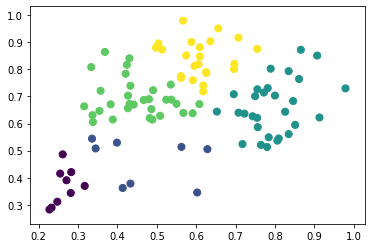

In [0]:
centers, labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');